## Ali Alaryan
### Project 1

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fsolve 
from scipy.optimize import minimize # for optimized parameter identification
from scipy.integrate import odeint # for ode integration

# reading data into 
data = pd.read_csv(r'C:\Users\alial\Desktop\Chem Math New\Project 1\mask-use-by-county.csv')
data

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,1001,0.053,0.074,0.134,0.295,0.444
1,1003,0.083,0.059,0.098,0.323,0.436
2,1005,0.067,0.121,0.120,0.201,0.491
3,1007,0.020,0.034,0.096,0.278,0.572
4,1009,0.053,0.114,0.180,0.194,0.459
...,...,...,...,...,...,...
3137,56037,0.061,0.295,0.230,0.146,0.268
3138,56039,0.095,0.157,0.160,0.247,0.340
3139,56041,0.098,0.278,0.154,0.207,0.264
3140,56043,0.204,0.155,0.069,0.285,0.287


C:\Users\alial\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


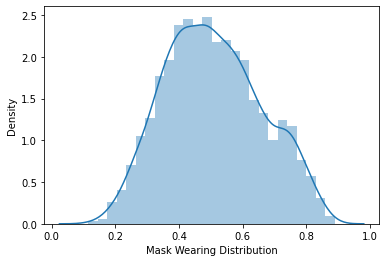

<Figure size 432x288 with 0 Axes>

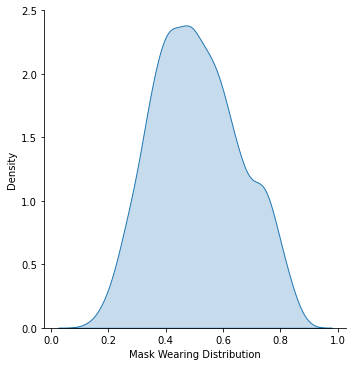

<Figure size 432x288 with 0 Axes>

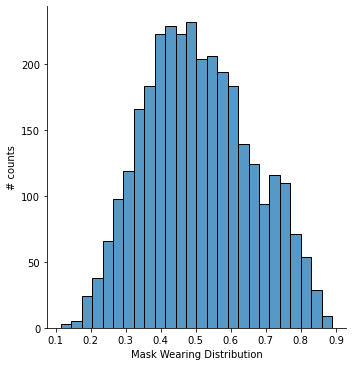

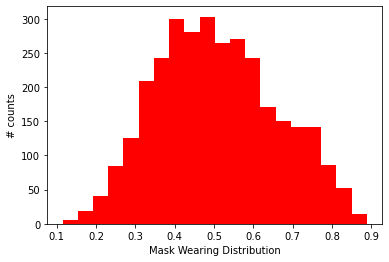

In [2]:
# to see behavior of the mask wearing

mask_always = data.iloc[:,5].values # always wearing
import seaborn as sns
plt.figure()
sns.distplot(mask_always)
plt.xlabel('Mask Wearing Distribution')
plt.ylabel('Density')

plt.figure()
sns.displot(mask_always,kind="kde",fill=True);
plt.xlabel('Mask Wearing Distribution')
plt.ylabel('Density')


plt.figure()
sns.displot(mask_always,kde=False,fill=True);
plt.xlabel('Mask Wearing Distribution')
plt.ylabel('# counts')

plt.figure()
plt.hist(mask_always,bins = 20,  color = "red");
plt.xlabel('Mask Wearing Distribution')
plt.ylabel('# counts')
plt.show()

In [3]:
# account always wearing mask is greater than 0.5 then it means its a mask wearing county
mask_prob = data.iloc[:,5].values # always wearing
n = len(mask_prob)
print(n)
mask_status = []

for i in range(n):
    if mask_prob[i] > 0.5:
        mask_status.append(1);
    else: mask_status.append(0);
data['mask status'] = mask_status
data     

3142


,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,mask status
0,1001,0.053,0.074,0.134,0.295,0.444,0
1,1003,0.083,0.059,0.098,0.323,0.436,0
2,1005,0.067,0.121,0.120,0.201,0.491,0
3,1007,0.020,0.034,0.096,0.278,0.572,1
4,1009,0.053,0.114,0.180,0.194,0.459,0
...,...,...,...,...,...,...,...
3137,56037,0.061,0.295,0.230,0.146,0.268,0
3138,56039,0.095,0.157,0.160,0.247,0.340,0
3139,56041,0.098,0.278,0.154,0.207,0.264,0
3140,56043,0.204,0.155,0.069,0.285,0.287,0


In [4]:
# to check data points for wearing mask and not wearing mask

count_mask  = 0
mask_status = data.iloc[:,6].values # always wearing

for i in range(len(mask_status)):
    if mask_status[i] >0.0:
        count_mask = count_mask+1;

no_mask  = len(mask_status)-count_mask;

print(f'Data points where people wear mask = {count_mask:.0f}\n')
print(f'Data points where people dont wear mask = {no_mask:.0f}\n')

mask_data = data # stored in mask data in this data set

Data points where people wear mask = 1544

Data points where people dont wear mask = 1598



From this, we have sufficient data points for people wearing mask and people who don't wear masks always.

In [5]:
# reading data into 
data_counties = pd.read_csv(r'C:\Users\alial\Desktop\Chem Math New\Project 1\us-counties-recent.csv')
data_counties

,date,county,state,fips,cases,deaths
0,2022-09-17,Autauga,Alabama,1001.0,18303,227.0
1,2022-09-17,Baldwin,Alabama,1003.0,65353,705.0
2,2022-09-17,Barbour,Alabama,1005.0,6873,101.0
3,2022-09-17,Bibb,Alabama,1007.0,7481,107.0
4,2022-09-17,Blount,Alabama,1009.0,16793,256.0
...,...,...,...,...,...,...
100962,2022-10-17,Sweetwater,Wyoming,56037.0,12152,131.0
100963,2022-10-17,Teton,Wyoming,56039.0,11771,16.0
100964,2022-10-17,Uinta,Wyoming,56041.0,6163,43.0
100965,2022-10-17,Washakie,Wyoming,56043.0,2668,47.0


<Figure size 432x288 with 0 Axes>

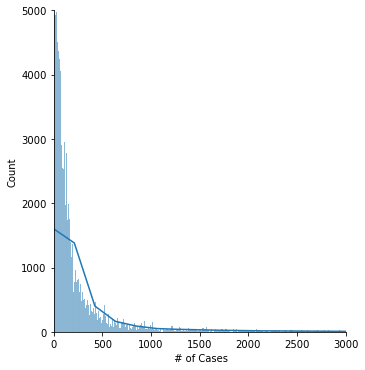

In [6]:
cases= data_counties.iloc[:,5].values # always wearing

plt.figure()
sns.displot(cases,kde=True,fill=True);
plt.xlim([0,3000])
plt.ylim([0,5000])
plt.xlabel(' # of Cases')
plt.ylabel('Count')
plt.show()

In [7]:
# Select rows between two dates using DataFrame.query()
select_date = "2022-10-16"
mask = (data_counties['date'] == select_date)
snapshot = data_counties.loc[mask]
snapshot

,date,county,state,fips,cases,deaths
94454,2022-10-16,Autauga,Alabama,1001.0,18452,228.0
94455,2022-10-16,Baldwin,Alabama,1003.0,65819,715.0
94456,2022-10-16,Barbour,Alabama,1005.0,6910,103.0
94457,2022-10-16,Bibb,Alabama,1007.0,7547,108.0
94458,2022-10-16,Blount,Alabama,1009.0,17256,258.0
...,...,...,...,...,...,...
97705,2022-10-16,Sweetwater,Wyoming,56037.0,12152,131.0
97706,2022-10-16,Teton,Wyoming,56039.0,11771,16.0
97707,2022-10-16,Uinta,Wyoming,56041.0,6163,43.0
97708,2022-10-16,Washakie,Wyoming,56043.0,2668,47.0


Number of data points in current status date snapshot is large and mask_status data contains less fips data. So, below we check which fip is missing.

In [8]:
fips = snapshot['fips'].values
county_fips =mask_data['COUNTYFP'].values
mask_status =[]
fips_selected = []
count = 0
for i in range(len(county_fips)):
    if county_fips[i] not in fips:
        print(county_fips[i],"not in list")
        count=count+1;
print(count)

2060 not in list
2105 not in list
2164 not in list
2282 not in list
36005 not in list
36047 not in list
36061 not in list
36081 not in list
36085 not in list
9


So, we have to drop duplicates based on fips id


In [9]:
df2 =snapshot.drop_duplicates(subset=["fips"], keep='last')
df2

,date,county,state,fips,cases,deaths
94454,2022-10-16,Autauga,Alabama,1001.0,18452,228.0
94455,2022-10-16,Baldwin,Alabama,1003.0,65819,715.0
94456,2022-10-16,Barbour,Alabama,1005.0,6910,103.0
94457,2022-10-16,Bibb,Alabama,1007.0,7547,108.0
94458,2022-10-16,Blount,Alabama,1009.0,17256,258.0
...,...,...,...,...,...,...
97705,2022-10-16,Sweetwater,Wyoming,56037.0,12152,131.0
97706,2022-10-16,Teton,Wyoming,56039.0,11771,16.0
97707,2022-10-16,Uinta,Wyoming,56041.0,6163,43.0
97708,2022-10-16,Washakie,Wyoming,56043.0,2668,47.0


In [10]:
snapshot = snapshot.dropna()
snapshot # now it does not include blanks

fips = snapshot['fips'].values
county_fips =mask_data['COUNTYFP'].values
mask_status =[]
fips_selected = []
mask_status = []
count = 0
idx = []
for i in range(len(fips)):
    if fips[i] in county_fips:
        #print("not in list or nan",fips[i])
        idx.append("Yes");
    else: idx.append("No")

snapshot["idx"]=idx # this shows that data for this county is present in mask_status data
snapshot

C:\Users\alial\AppData\Local\Temp/ipykernel_16740/184909316.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snapshot["idx"]=idx # this shows that data for this county is present in mask_status data


,date,county,state,fips,cases,deaths,idx
94454,2022-10-16,Autauga,Alabama,1001.0,18452,228.0,Yes
94455,2022-10-16,Baldwin,Alabama,1003.0,65819,715.0,Yes
94456,2022-10-16,Barbour,Alabama,1005.0,6910,103.0,Yes
94457,2022-10-16,Bibb,Alabama,1007.0,7547,108.0,Yes
94458,2022-10-16,Blount,Alabama,1009.0,17256,258.0,Yes
...,...,...,...,...,...,...,...
97705,2022-10-16,Sweetwater,Wyoming,56037.0,12152,131.0,Yes
97706,2022-10-16,Teton,Wyoming,56039.0,11771,16.0,Yes
97707,2022-10-16,Uinta,Wyoming,56041.0,6163,43.0,Yes
97708,2022-10-16,Washakie,Wyoming,56043.0,2668,47.0,Yes


In [11]:
snapshot =snapshot.drop_duplicates(subset=["fips"], keep='last')
snapshot

,date,county,state,fips,cases,deaths,idx
94454,2022-10-16,Autauga,Alabama,1001.0,18452,228.0,Yes
94455,2022-10-16,Baldwin,Alabama,1003.0,65819,715.0,Yes
94456,2022-10-16,Barbour,Alabama,1005.0,6910,103.0,Yes
94457,2022-10-16,Bibb,Alabama,1007.0,7547,108.0,Yes
94458,2022-10-16,Blount,Alabama,1009.0,17256,258.0,Yes
...,...,...,...,...,...,...,...
97705,2022-10-16,Sweetwater,Wyoming,56037.0,12152,131.0,Yes
97706,2022-10-16,Teton,Wyoming,56039.0,11771,16.0,Yes
97707,2022-10-16,Uinta,Wyoming,56041.0,6163,43.0,Yes
97708,2022-10-16,Washakie,Wyoming,56043.0,2668,47.0,Yes


In [12]:
mask_data = mask_data.drop_duplicates(subset=['COUNTYFP'], keep='last')
mask_data

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,mask status
0,1001,0.053,0.074,0.134,0.295,0.444,0
1,1003,0.083,0.059,0.098,0.323,0.436,0
2,1005,0.067,0.121,0.120,0.201,0.491,0
3,1007,0.020,0.034,0.096,0.278,0.572,1
4,1009,0.053,0.114,0.180,0.194,0.459,0
...,...,...,...,...,...,...,...
3137,56037,0.061,0.295,0.230,0.146,0.268,0
3138,56039,0.095,0.157,0.160,0.247,0.340,0
3139,56041,0.098,0.278,0.154,0.207,0.264,0
3140,56043,0.204,0.155,0.069,0.285,0.287,0


In [ ]:
i =2

fips = snapshot['fips'].values

fips_county =mask_data['COUNTYFP'].values
mask_county = mask_data['mask status'].values

count=0;
n = len(fips)
mask_status = 2*np.ones(n)
m = len(mask_county)

print(mask_status)
print(mask_status[0])

for j in range(m):

    for i in range(n):
        if fips[j] == fips_county[i]:
            count = count+1;
            mask_status[i]=mask_county[j];
        
print(count)
print(mask_status)

snapshot['Mask Status']=mask_status

[2. 2. 2. ... 2. 2. 2.]
2.0


In [20]:
# split data between mask and no mask now
maskIDX = (snapshot['Mask Status'] == 1)
no_maskIDX = (snapshot['Mask Status'] == 0)
mask_no = snapshot.loc[no_maskIDX]
mask_yes = snapshot.loc[maskIDX]

In [21]:
mask_no

,date,county,state,fips,cases,deaths,idx,Mask Status
94454,2022-10-16,Autauga,Alabama,1001.0,18452,228.0,Yes,0.0
94455,2022-10-16,Baldwin,Alabama,1003.0,65819,715.0,Yes,0.0
94456,2022-10-16,Barbour,Alabama,1005.0,6910,103.0,Yes,0.0
94458,2022-10-16,Blount,Alabama,1009.0,17256,258.0,Yes,0.0
94459,2022-10-16,Bullock,Alabama,1011.0,2813,54.0,Yes,0.0
...,...,...,...,...,...,...,...,...
97705,2022-10-16,Sweetwater,Wyoming,56037.0,12152,131.0,Yes,0.0
97706,2022-10-16,Teton,Wyoming,56039.0,11771,16.0,Yes,0.0
97707,2022-10-16,Uinta,Wyoming,56041.0,6163,43.0,Yes,0.0
97708,2022-10-16,Washakie,Wyoming,56043.0,2668,47.0,Yes,0.0


In [22]:
mask_yes

,date,county,state,fips,cases,deaths,idx,Mask Status
94457,2022-10-16,Bibb,Alabama,1007.0,7547,108.0,Yes,1.0
94462,2022-10-16,Chambers,Alabama,1017.0,10008,169.0,Yes,1.0
94463,2022-10-16,Cherokee,Alabama,1019.0,6029,87.0,Yes,1.0
94464,2022-10-16,Chilton,Alabama,1021.0,12421,214.0,Yes,1.0
94465,2022-10-16,Choctaw,Alabama,1023.0,2192,38.0,Yes,1.0
...,...,...,...,...,...,...,...,...
97658,2022-10-16,Oneida,Wisconsin,55085.0,10159,145.0,Yes,1.0
97665,2022-10-16,Price,Wisconsin,55099.0,3789,35.0,Yes,1.0
97666,2022-10-16,Racine,Wisconsin,55101.0,66380,720.0,Yes,1.0
97678,2022-10-16,Vilas,Wisconsin,55125.0,6116,101.0,Yes,1.0


So, we have sufficient data for both mask and no mask cases. Now, we will apply 2 sample t-test and test hypothesis that both data comes from same population that will be Null hypothesis. Alternate hypothesis is there is not significant evidence that both comes from same population. If alternate hypothesis is valid, then we can say that wearing mask can affect the infection.

In [23]:
cases_no_mask = mask_no['cases'].values
cases_mask = mask_yes['cases'].values

print(f'mean value of cases with no mask: {cases_no_mask.mean():.0f}')
print(f'mean value of cases with mask: {cases_mask.mean():.0f}')

print(f'standard deviation value of cases with no mask: {cases_no_mask.std():.0f}')
print(f'standard deviation value of cases with mask: {cases_mask.std():.0f}')

mean value of cases with no mask: 19352
mean value of cases with mask: 39627
standard deviation value of cases with no mask: 68348
standard deviation value of cases with mask: 126013


Text(6.799999999999997, 0.5, 'Density')

<Figure size 432x288 with 0 Axes>

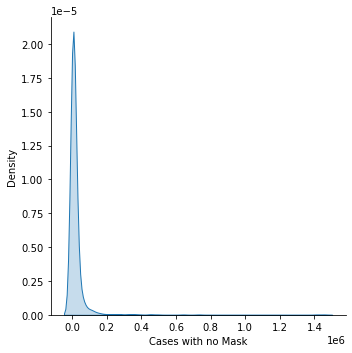

<Figure size 432x288 with 0 Axes>

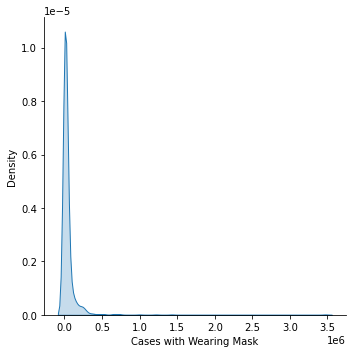

In [24]:
plt.figure()
sns.displot(cases_no_mask,kind="kde",fill=True);
plt.xlabel('Cases with no Mask')
plt.ylabel('Density')

plt.figure()
sns.displot(cases_mask,kind="kde",fill=True);
plt.xlabel('Cases with Wearing Mask')
plt.ylabel('Density')

In [ ]:
def t2(x1,x2):
    #Standard Deviation
    sp1=np.sqrt(np.sum((x1-np.mean(x1))**2)/len(x1))
    sp2=np.sqrt(np.sum((x2-np.mean(x2))**2)/len(x2))
    sp=np.sqrt((sp1**2+sp2**2)/2)
    #t value
    t=(np.mean(x1)-np.mean(x2))/(sp*np.sqrt(2/(len(x2)-1)))
    return(t)


mu= cases_no_mask.mean()
sd= cases_no_mask.std()
# make single and two sample variables to collect data
n = 100000; # number of iterations/t values to calculate
t_double=np.zeros(n)
# Two sample t distribution
for s in np.arange(1,n,1):
    SET1=np.random.normal(mu,sd,10)
    SET2=np.random.normal(mu,sd,10)
    t_double[s]=t2(SET1,SET2)

t2(cases_mask,cases_no_mask)

sns.displot(t_double,kind="kde",fill=True);
plt.xlim(-7.5,7.5)



a = cases_no_mask
b = cases_mask

t = t2(a,b)
print(f't value calculated: {t:.4f}')

p_calc = sum(abs(t_double) >=abs(t))/n # One sided p value


p_calc_2 = p_calc *2 # Two sided p value

print(f'The calculated 2-tailed p value is {p_calc_2:.10e}')

t,p =stats.ttest_ind(a, b)
print(f'The p value calculated using the stats library is {p}')
print(f'The t value calculated using the stats library is {t}')

## Vaccination Status of a county
For vaccine and not vaccinated, we have to take data before all vaccinated and after all vaccinated.

In [25]:
# reading data into 
data = pd.read_csv(r'C:\Users\alial\Desktop\Chem Math New\Project 1\us-counties-2020.csv')
data # shows status of no vaccine

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
884732,2020-12-31,Sweetwater,Wyoming,56037.0,2966,16.0
884733,2020-12-31,Teton,Wyoming,56039.0,2138,4.0
884734,2020-12-31,Uinta,Wyoming,56041.0,1558,7.0
884735,2020-12-31,Washakie,Wyoming,56043.0,780,19.0


In [26]:
# Select rows between two dates using DataFrame.query()
select_date = "2020-12-30"
idx = (data['date'] == select_date)
snapshot = data.loc[idx]
snapshot

,date,county,state,fips,cases,deaths
878247,2020-12-30,Autauga,Alabama,1001.0,4164,48.0
878248,2020-12-30,Baldwin,Alabama,1003.0,13392,160.0
878249,2020-12-30,Barbour,Alabama,1005.0,1492,32.0
878250,2020-12-30,Bibb,Alabama,1007.0,1817,46.0
878251,2020-12-30,Blount,Alabama,1009.0,4584,63.0
...,...,...,...,...,...,...
881487,2020-12-30,Sweetwater,Wyoming,56037.0,2943,15.0
881488,2020-12-30,Teton,Wyoming,56039.0,2121,3.0
881489,2020-12-30,Uinta,Wyoming,56041.0,1540,7.0
881490,2020-12-30,Washakie,Wyoming,56043.0,767,16.0


<Figure size 432x288 with 0 Axes>

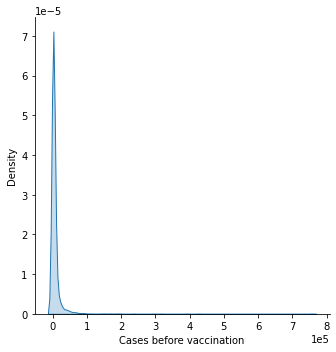

In [27]:
plt.figure()
sns.displot(snapshot['cases'],kind="kde",fill=True);
plt.xlabel('Cases before vaccination')
plt.ylabel('Density')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))

In [28]:
# reading data into 
data = pd.read_csv(r'C:\Users\alial\Desktop\Chem Math New\Project 1\us-counties-2021.csv')
data # shows status of no vaccine

,date,county,state,fips,cases,deaths
0,2021-01-01,Autauga,Alabama,1001.0,4239,50.0
1,2021-01-01,Baldwin,Alabama,1003.0,13823,169.0
2,2021-01-01,Barbour,Alabama,1005.0,1517,33.0
3,2021-01-01,Bibb,Alabama,1007.0,1854,46.0
4,2021-01-01,Blount,Alabama,1009.0,4693,63.0
...,...,...,...,...,...,...
1185368,2021-12-31,Sweetwater,Wyoming,56037.0,8320,107.0
1185369,2021-12-31,Teton,Wyoming,56039.0,5950,14.0
1185370,2021-12-31,Uinta,Wyoming,56041.0,4154,31.0
1185371,2021-12-31,Washakie,Wyoming,56043.0,1879,37.0


In [29]:
# Select rows between two dates using DataFrame.query()
select_date = "2021-12-30"
idx = (data['date'] == select_date)
snapshot = data.loc[idx]
snapshot

,date,county,state,fips,cases,deaths
1178872,2021-12-30,Autauga,Alabama,1001.0,10953,160.0
1178873,2021-12-30,Baldwin,Alabama,1003.0,39583,593.0
1178874,2021-12-30,Barbour,Alabama,1005.0,3819,81.0
1178875,2021-12-30,Bibb,Alabama,1007.0,4514,95.0
1178876,2021-12-30,Blount,Alabama,1009.0,11193,198.0
...,...,...,...,...,...,...
1182117,2021-12-30,Sweetwater,Wyoming,56037.0,8320,107.0
1182118,2021-12-30,Teton,Wyoming,56039.0,5950,14.0
1182119,2021-12-30,Uinta,Wyoming,56041.0,4154,31.0
1182120,2021-12-30,Washakie,Wyoming,56043.0,1879,37.0


<Figure size 432x288 with 0 Axes>

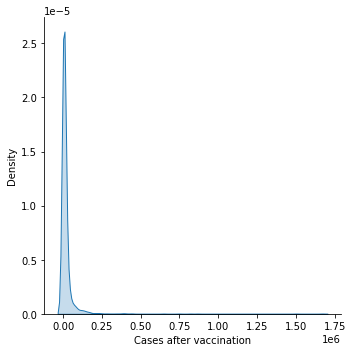

In [30]:
plt.figure()
sns.displot(snapshot['cases'],kind="kde",fill=True);
plt.xlabel('Cases after vaccination')
plt.ylabel('Density')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))

## Statewide vaccination status per hundered

In [31]:
# reading data into 
data = pd.read_csv(r'C:\Users\alial\Desktop\Chem Math New\Project 1\us_state_vaccinations.csv')
data # shows status of no vaccine

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207,NaN,NaN
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222,NaN,NaN
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212,NaN,NaN
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226,NaN,NaN
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7498.0,1529.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,2022-10-08,Wyoming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,871.0,1505.0,NaN,NaN,NaN
41184,2022-10-09,Wyoming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,871.0,1505.0,NaN,NaN,NaN
41185,2022-10-10,Wyoming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,871.0,1505.0,NaN,NaN,NaN
41186,2022-10-11,Wyoming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,871.0,1505.0,NaN,NaN,NaN


In [32]:
# Select rows between two dates using DataFrame.query()
select_date = "2021-01-14"
idx = (data['date'] == select_date)
snapshot = data.loc[idx]
snapshot

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212,NaN,NaN
641,2021-01-14,Alaska,42596.0,150450.0,35508.0,NaN,5.82,NaN,4.85,20.57,3916.0,3379.0,4619.0,0.283,NaN,NaN
1280,2021-01-14,American Samoa,2971.0,10650.0,2409.0,NaN,5.33,NaN,4.33,19.12,394.0,424.0,7614.0,0.279,NaN,NaN
1919,2021-01-14,Arizona,173665.0,570625.0,157397.0,NaN,2.39,NaN,2.16,7.84,18920.0,16155.0,2219.0,0.304,NaN,NaN
2558,2021-01-14,Arkansas,108316.0,297800.0,90339.0,NaN,3.59,NaN,2.99,9.87,13462.0,33718.0,11173.0,0.364,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37995,2021-01-14,Virginia,217836.0,852725.0,192918.0,NaN,2.55,NaN,2.26,9.99,0.0,13614.0,1595.0,0.255,NaN,NaN
38634,2021-01-14,Washington,225238.0,655575.0,187450.0,NaN,2.96,NaN,2.46,8.61,17000.0,14836.0,1948.0,0.344,NaN,NaN
39273,2021-01-14,West Virginia,118660.0,160975.0,99061.0,NaN,6.62,NaN,5.53,8.98,7951.0,7665.0,4277.0,0.737,NaN,NaN
39912,2021-01-14,Wisconsin,149955.0,437900.0,135841.0,NaN,2.58,NaN,2.33,7.52,12702.0,6351.0,1091.0,0.342,NaN,NaN


<Figure size 432x288 with 0 Axes>

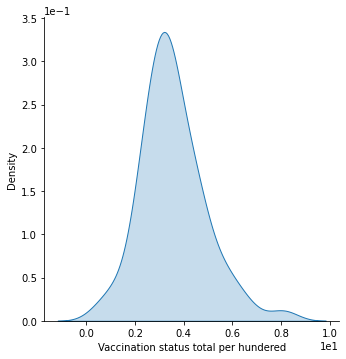

In [33]:
plt.figure()
sns.displot(snapshot['total_vaccinations_per_hundred'],kind="kde",fill=True);
plt.xlabel('Vaccination status total per hundered')
plt.ylabel('Density')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))

### Application of 2 sample t-test on Face Mask Status 
The data sets of mask_no and mask_yes are going to be utilized.
From standard deviation of each data set, it has been found that there is unequal variance in both data set. So, we apply 2 sample t-test to check whether data set of mask_yes comes from the same population that is mask_no data set or not. Data sets have differnt number of data points.

**Null Hypothesis:**       $  H_0$ : $ \mu_1 = \mu_2$  

**Alternate Hypothesis:**  $  H_1$ : $ \mu_1 > \mu_2$

**Test statistics :**

$$ t = \frac{\bar x_1  - \bar x_2 }{\sigma_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}} $$


In [34]:
from scipy import stats
#cases_no_mask = mask_no['cases'].values
#cases_mask = mask_yes['cases'].values

print(cases_no_mask.mean())
print(cases_mask.mean())

print(cases_no_mask.std())
print(cases_mask.std())

19352.319949811794
39627.0032488629
68347.62716483472
126013.25531971724


In [35]:
t2 = stats.ttest_ind(cases_no_mask,cases_mask,equal_var=False)
t2

Ttest_indResult(statistic=-5.568387522465044, pvalue=2.8635695981348174e-08)

From p-value, we cannot reject null hypothesis. There is no difference between the two samples.

## Vaccination Status

In [36]:
data = pd.read_csv(r'C:\Users\alial\Desktop\Chem Math New\Project 1\mask-use-by-county.csv')

fips=data.COUNTYFP
n=len(fips)

state_id = np.zeros((n))

for i in range(n):
    state_id[i]=int(math.floor(fips[i]/1000))

data['state_id'] = state_id
data

n=int(max(state_id))
mask_always=np.zeros(n)
i=1
for i in range(1,56):
    mask_always[i-1] = data.loc[(data.state_id == i)][["ALWAYS"]].mean().to_numpy()
    #print(mask_always[i-1])
state_ids = np.linspace(1,56,56)

#mask_data['state_id'] = state_ids
#mask_data

column_values = ['state_id']

mask_data = pd.DataFrame(data = state_ids, 
                  columns = column_values)
mask_data['Mask_ALWAYS']=mask_always

mask_data.dropna()

,state_id,Mask_ALWAYS
0,1.0,0.475313
1,2.0,0.458586
3,4.0,0.655000
4,5.0,0.462867
5,6.0,0.714638
7,8.0,0.547437
8,9.0,0.779500
9,10.0,0.817667
10,11.0,0.743000
11,12.0,0.582552


In [37]:
# reading data into 
state_names = pd.read_csv(r'C:\Users\alial\Desktop\Chem Math New\Project 1\us-state-ansi-fips.csv')

MaskStateStatus = pd.merge(mask_data, state_names, left_on='state_id',right_on=' st').drop(columns=["state_id"," st"," stusps"])

MaskStateStatus.rename(columns = {'stname':'STATE'}, inplace = True)

MaskStateStatus=MaskStateStatus.iloc[:,[1,0]] 

state_names

,stname,st,stusps
0,Alabama,1,AL
1,Alaska,2,AK
2,Arizona,4,AZ
3,Arkansas,5,AR
4,California,6,CA
5,Colorado,8,CO
6,Connecticut,9,CT
7,Delaware,10,DE
8,District of Columbia,11,DC
9,Florida,12,FL


In [38]:
MaskStateStatus

,STATE,Mask_ALWAYS
0,Alabama,0.475313
1,Alaska,0.458586
2,Arizona,0.655000
3,Arkansas,0.462867
4,California,0.714638
5,Colorado,0.547437
6,Connecticut,0.779500
7,Delaware,0.817667
8,District of Columbia,0.743000
9,Florida,0.582552


###  Population data by STATE
Now collecting population data by state.

In [39]:
pop_data = pd.read_csv(r'C:\Users\alial\Desktop\Chem Math New\Project 1\2019_Census_US_Population_Data_By_State_Lat_Long.csv')

vaccinationData = pd.read_csv(r'C:\Users\alial\Desktop\Chem Math New\Project 1\us_state_vaccinations.csv')
vaccinationData
pop_data

,STATE,POPESTIMATE2019,lat,long
0,Alabama,4903185,32.377716,-86.300568
1,Alaska,731545,58.301598,-134.420212
2,Arizona,7278717,33.448143,-112.096962
3,Arkansas,3017804,34.746613,-92.288986
4,California,39512223,38.576668,-121.493629
5,Colorado,5758736,39.739227,-104.984856
6,Connecticut,3565287,41.764046,-72.682198
7,Delaware,973764,39.157307,-75.519722
8,District of Columbia,705749,38.895110,-77.036370
9,Florida,21477737,30.438118,-84.281296


In [40]:
# Get the most recent date for filtering
from datetime import date, timedelta
freshDate = date.today() - timedelta(days=650)
freshDate = date.strftime(freshDate,"%Y%m%d")
freshDate = freshDate[0:4] + "-" + freshDate[4:6] + "-" + freshDate[6:8]

print(freshDate)

vaccinationByLocation = vaccinationData.loc[(vaccinationData.date == freshDate)][["location", "people_vaccinated"]]

vaccinationByLocation
# Vaccination and population data
vaccinationAndPopulationByLocation = pd.merge(pop_data, vaccinationByLocation, left_on='STATE',right_on='location').drop(columns=["location","lat","long"])

# Calculate percentage vaccinated by state
vaccinationAndPopulationByLocation["percent_vaccinated"] = vaccinationAndPopulationByLocation["people_vaccinated"] / vaccinationAndPopulationByLocation["POPESTIMATE2019"]

#vaccinationAndPopulationByLocation

vaccination_mask_pop = pd.merge(MaskStateStatus, vaccinationAndPopulationByLocation, left_on='STATE',right_on='STATE')#.drop(columns=["location","lat","long"])
#vaccination_mask_pop

cases_state = pd.read_csv(r'C:\Users\alial\Desktop\Chem Math New\Project 1\us-states.csv')
#cases_state
casesByLocation = cases_state.loc[(cases_state.date == freshDate)][["state", "cases","deaths"]]

casesByLocation=casesByLocation.iloc[:,[0,1,2]]
#casesByLocation

All_Data  = pd.merge(casesByLocation,vaccination_mask_pop, left_on='state',right_on='STATE').drop(columns=["state"])

All_Data['percent_cases'] = All_Data['cases']/All_Data['POPESTIMATE2019']

Pday = All_Data # to store snapshot for 1 day
Pday

2021-01-13


,cases,deaths,STATE,Mask_ALWAYS,POPESTIMATE2019,people_vaccinated,percent_vaccinated,percent_cases
0,410995,5760,Alabama,0.475313,4903185,74792.0,0.015254,0.083822
1,50526,217,Alaska,0.458586,731545,24541.0,0.033547,0.069068
2,643683,10689,Arizona,0.655000,7278717,104387.0,0.014341,0.088434
3,262020,4186,Arkansas,0.462867,3017804,80458.0,0.026661,0.086825
4,2858041,31653,California,0.714638,39512223,744545.0,0.018843,0.072333
5,368775,5354,Colorado,0.547437,5758736,198227.0,0.034422,0.064037
6,220576,6536,Connecticut,0.779500,3565287,58920.0,0.016526,0.061868
7,67173,994,Delaware,0.817667,973764,16647.0,0.017096,0.068983
8,32600,831,District of Columbia,0.743000,705749,1957.0,0.002773,0.046192
9,1517464,23395,Florida,0.582552,21477737,647330.0,0.030140,0.070653


### Cases Data

State wide cases data is collected for a specific date

In [41]:
# to get next day cases and death etc

# Get the most recent date for filtering
freshDate = date.today() - timedelta(days=649)
freshDate = date.strftime(freshDate,"%Y%m%d")
freshDate = freshDate[0:4] + "-" + freshDate[4:6] + "-" + freshDate[6:8]

print(freshDate)

vaccinationByLocation = vaccinationData.loc[(vaccinationData.date == freshDate)][["location", "people_vaccinated"]]

vaccinationByLocation
# Vaccination and population data
vaccinationAndPopulationByLocation = pd.merge(pop_data, vaccinationByLocation, left_on='STATE',right_on='location').drop(columns=["location","lat","long"])

# Calculate percentage vaccinated by state
vaccinationAndPopulationByLocation["percent_vaccinated"] = vaccinationAndPopulationByLocation["people_vaccinated"] / vaccinationAndPopulationByLocation["POPESTIMATE2019"]

#vaccinationAndPopulationByLocation

vaccination_mask_pop = pd.merge(MaskStateStatus, vaccinationAndPopulationByLocation, left_on='STATE',right_on='STATE')#.drop(columns=["location","lat","long"])
#vaccination_mask_pop

cases_state = pd.read_csv(r'C:\Users\alial\Desktop\Chem Math New\Project 1\us-states.csv')
#cases_state
casesByLocation = cases_state.loc[(cases_state.date == freshDate)][["state", "cases","deaths"]]

casesByLocation=casesByLocation.iloc[:,[0,1,2]]
#casesByLocation

All_Data  = pd.merge(casesByLocation,vaccination_mask_pop, left_on='state',right_on='STATE').drop(columns=["state"])

All_Data['percent_cases'] = All_Data['cases']/All_Data['POPESTIMATE2019']


Nextday = All_Data # to store snapshot for 1 day

Nextday

2021-01-14


,cases,deaths,STATE,Mask_ALWAYS,POPESTIMATE2019,people_vaccinated,percent_vaccinated,percent_cases
0,414583,5945,Alabama,0.475313,4903185,80480.0,0.016414,0.084554
1,50861,219,Alaska,0.458586,731545,35508.0,0.048538,0.069525
2,653546,10876,Arizona,0.655000,7278717,157397.0,0.021624,0.089789
3,264511,4228,Arkansas,0.462867,3017804,90339.0,0.029935,0.087650
4,2898756,32246,California,0.714638,39512223,801998.0,0.020297,0.073364
5,371362,5385,Colorado,0.547437,5758736,209300.0,0.036345,0.064487
6,221544,6553,Connecticut,0.779500,3565287,156366.0,0.043858,0.062139
7,68065,995,Delaware,0.817667,973764,25649.0,0.026340,0.069899
8,32820,842,District of Columbia,0.743000,705749,29927.0,0.042405,0.046504
9,1531184,23612,Florida,0.582552,21477737,709002.0,0.033011,0.071292


In [42]:
rise_cases_before_vaccination  = Nextday['cases']-Pday['cases']

#rise_cases_before_vaccination
#This is the distribution of cases rise before vaccination

### After vaccination or current data


In [43]:
# Get the most recent date for filtering
freshDate = date.today() - timedelta(days=150) # day at which data is present for state wide
freshDate = date.strftime(freshDate,"%Y%m%d")
freshDate = freshDate[0:4] + "-" + freshDate[4:6] + "-" + freshDate[6:8]

print(freshDate)

vaccinationByLocation = vaccinationData.loc[(vaccinationData.date == freshDate)][["location", "people_vaccinated"]]

vaccinationByLocation
# Vaccination and population data
vaccinationAndPopulationByLocation = pd.merge(pop_data, vaccinationByLocation, left_on='STATE',right_on='location').drop(columns=["location","lat","long"])

# Calculate percentage vaccinated by state
vaccinationAndPopulationByLocation["percent_vaccinated"] = vaccinationAndPopulationByLocation["people_vaccinated"] / vaccinationAndPopulationByLocation["POPESTIMATE2019"]

#vaccinationAndPopulationByLocation

vaccination_mask_pop = pd.merge(MaskStateStatus, vaccinationAndPopulationByLocation, left_on='STATE',right_on='STATE')#.drop(columns=["location","lat","long"])
#vaccination_mask_pop

cases_state = pd.read_csv(r'C:\Users\alial\Desktop\Chem Math New\Project 1\us-states.csv')
#cases_state
casesByLocation = cases_state.loc[(cases_state.date == freshDate)][["state", "cases","deaths"]]

casesByLocation=casesByLocation.iloc[:,[0,1,2]]
#casesByLocation

All_Data  = pd.merge(casesByLocation,vaccination_mask_pop, left_on='state',right_on='STATE').drop(columns=["state"])

All_Data['percent_cases'] = All_Data['cases']/All_Data['POPESTIMATE2019']


Pday = All_Data # to store snapshot for Present day

Pday

2022-05-28


,cases,deaths,STATE,Mask_ALWAYS,POPESTIMATE2019,people_vaccinated,percent_vaccinated,percent_cases
0,1312437,19658,Alabama,0.475313,4903185,NaN,NaN,0.267670
1,258867,1246,Alaska,0.458586,731545,NaN,NaN,0.353863
2,2049627,30299,Arizona,0.655000,7278717,NaN,NaN,0.281592
3,842815,11478,Arkansas,0.462867,3017804,NaN,NaN,0.279281
4,9557347,91463,California,0.714638,39512223,NaN,NaN,0.241883
5,1448346,12747,Colorado,0.547437,5758736,NaN,NaN,0.251504
6,806467,10941,Connecticut,0.779500,3565287,NaN,NaN,0.226200
7,274899,2956,Delaware,0.817667,973764,NaN,NaN,0.282306
8,149271,1342,District of Columbia,0.743000,705749,NaN,NaN,0.211507
9,6125115,74466,Florida,0.582552,21477737,NaN,NaN,0.285184


In [44]:
# Get the most recent date for filtering
freshDate = date.today() - timedelta(days=149) # day at which data is present for state wide
freshDate = date.strftime(freshDate,"%Y%m%d")
freshDate = freshDate[0:4] + "-" + freshDate[4:6] + "-" + freshDate[6:8]

print(freshDate)

vaccinationByLocation = vaccinationData.loc[(vaccinationData.date == freshDate)][["location", "people_vaccinated"]]

vaccinationByLocation
# Vaccination and population data
vaccinationAndPopulationByLocation = pd.merge(pop_data, vaccinationByLocation, left_on='STATE',right_on='location').drop(columns=["location","lat","long"])

# Calculate percentage vaccinated by state
vaccinationAndPopulationByLocation["percent_vaccinated"] = vaccinationAndPopulationByLocation["people_vaccinated"] / vaccinationAndPopulationByLocation["POPESTIMATE2019"]

#vaccinationAndPopulationByLocation

vaccination_mask_pop = pd.merge(MaskStateStatus, vaccinationAndPopulationByLocation, left_on='STATE',right_on='STATE')#.drop(columns=["location","lat","long"])
#vaccination_mask_pop

cases_state = pd.read_csv(r'C:\Users\alial\Desktop\Chem Math New\Project 1\us-states.csv')
#cases_state
casesByLocation = cases_state.loc[(cases_state.date == freshDate)][["state", "cases","deaths"]]

casesByLocation=casesByLocation.iloc[:,[0,1,2]]
#casesByLocation

All_Data  = pd.merge(casesByLocation,vaccination_mask_pop, left_on='state',right_on='STATE').drop(columns=["state"])

All_Data['percent_cases'] = All_Data['cases']/All_Data['POPESTIMATE2019']


Nextday = All_Data # to store snapshot for Present day

Nextday

2022-05-29


,cases,deaths,STATE,Mask_ALWAYS,POPESTIMATE2019,people_vaccinated,percent_vaccinated,percent_cases
0,1312437,19658,Alabama,0.475313,4903185,NaN,NaN,0.267670
1,258867,1246,Alaska,0.458586,731545,NaN,NaN,0.353863
2,2049627,30299,Arizona,0.655000,7278717,NaN,NaN,0.281592
3,843065,11481,Arkansas,0.462867,3017804,NaN,NaN,0.279364
4,9557347,91464,California,0.714638,39512223,NaN,NaN,0.241883
5,1448346,12747,Colorado,0.547437,5758736,NaN,NaN,0.251504
6,806467,10941,Connecticut,0.779500,3565287,NaN,NaN,0.226200
7,274899,2956,Delaware,0.817667,973764,NaN,NaN,0.282306
8,149271,1342,District of Columbia,0.743000,705749,NaN,NaN,0.211507
9,6125115,74466,Florida,0.582552,21477737,NaN,NaN,0.285184


In [45]:
rise_cases_after_vaccination  = Nextday['cases']-Pday['cases']

### Distribution of rise in cases before and after vaccination

<Figure size 432x288 with 0 Axes>

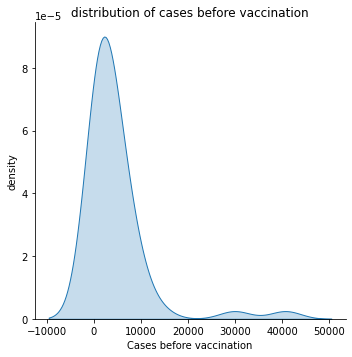

<Figure size 432x288 with 0 Axes>

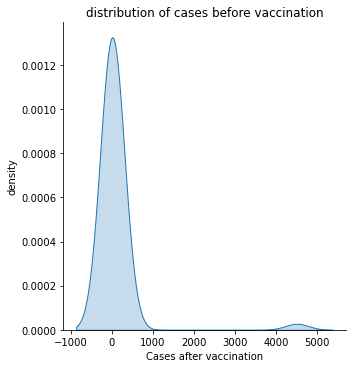

In [46]:
plt.figure()

sns.displot(rise_cases_before_vaccination,kind="kde",fill=True);
plt.xlabel('Cases before vaccination')
plt.ylabel('density')
#plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
plt.title('distribution of cases before vaccination')

plt.figure()

sns.displot(rise_cases_after_vaccination,kind="kde",fill=True);
plt.xlabel('Cases after vaccination')
plt.ylabel('density')
#plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
plt.title('distribution of cases before vaccination')
plt.show()

### Application of 2 sample t-test on before and after Vaccine status 
The data sets of not vaccinated and vaccinated are going to be utilized.
From standard deviation of each data set, it has been found that there is unequal variance in both data set. So, we apply 2 sample t-test to check whether data set of vaccinated comes from the same population that is not-vaccinated data set or not. Data sets have differnt number of data points.

**Null Hypothesis:**       $  H_0$ : $ \mu_1 = \mu_2$  

**Alternate Hypothesis:**  $  H_1$ : $ \mu_1 > \mu_2$

**Test statistics :**

$$ t = \frac{\bar x_1  - \bar x_2 }{\sigma_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}} $$




In [47]:
print('Before vaccination:')

print(f'mean value: {rise_cases_before_vaccination.mean():.0f} ')
print(f'standard dev.: {rise_cases_before_vaccination.std():.2f}')


print('After vaccination:')
print(f'mean value: {rise_cases_after_vaccination.mean():.0f} ')
print(f'standard dev.: {rise_cases_after_vaccination.std():.2f}')

Before vaccination:
mean value: 4503 
standard dev.: 7120.21
After vaccination:
mean value: 99 
standard dev.: 638.56


In [48]:
t2 = stats.ttest_ind(rise_cases_before_vaccination,rise_cases_after_vaccination,equal_var=False)
t2

Ttest_indResult(statistic=4.356435407727045, pvalue=6.59934886032375e-05)

As p-value < 0.05, so we have sufficient evidence to reject Null hypothesis. So, we can conclude that there is a drastic difference occured due to application of vaccination.

## T2 test manual calculations [vaccine data]:

t2 test for vaccination and no vaccination data sets


In [ ]:
def t2(x1,x2):
    #Standard Deviation
    sp1=np.sqrt(np.sum((x1-np.mean(x1))**2)/len(x1))
    sp2=np.sqrt(np.sum((x2-np.mean(x2))**2)/len(x2))
    sp=np.sqrt((sp1**2+sp2**2)/2)
    #t value
    t=(np.mean(x1)-np.mean(x2))/(sp*np.sqrt(2/(len(x2)-1)))
    return(t)


mu= rise_cases_before_vaccination.mean()
sd= rise_cases_before_vaccination.std()
# make single and two sample variables to collect data
n = 100000; # number of iterations/t values to calculate
t_double=np.zeros(n)
# Two sample t distribution
for s in np.arange(1,n,1):
    SET1=np.random.normal(mu,sd,10)
    SET2=np.random.normal(mu,sd,10)
    t_double[s]=t2(SET1,SET2)

t2(rise_cases_before_vaccination,rise_cases_after_vaccination)
sns.displot(t_double,kind="kde",fill=True);
plt.xlim(-7.5,7.5)

print(max(t_double))

In [ ]:
a = rise_cases_before_vaccination
b = rise_cases_after_vaccination

t = t2(a,b)
print(f't value calculated: {t:.4f}')

p_calc = sum(abs(t_double) >=abs(t))/n # One sided p value

print(p_calc)
p_calc_2 = p_calc *2 # Two sided p value


print(f'The calculated 2-tailed p value is {p_calc_2:.10e}')

t,p =stats.ttest_ind(a, b)
print(f'The p value calculated using the stats library is {p}')
print(f'The t value calculated using the stats library is {t}')

### Final data collection 

from this, We have state wide:
1. cases
2. deaths
3. mask wearing behavior of population who alwasy wear mask
4. people population
5. people vaccinated
6. people percentage vaccinated
7. percent cases

## Regression Analysis


In [49]:
# Get the most recent date for filtering
freshDate = date.today() - timedelta(days=151) # day at which data is present for state wide
freshDate = date.strftime(freshDate,"%Y%m%d")
freshDate = freshDate[0:4] + "-" + freshDate[4:6] + "-" + freshDate[6:8]

print(freshDate)

vaccinationByLocation = vaccinationData.loc[(vaccinationData.date >= freshDate)][["location", "people_vaccinated"]]

vaccinationByLocation
# Vaccination and population data
vaccinationAndPopulationByLocation = pd.merge(pop_data, vaccinationByLocation, left_on='STATE',right_on='location').drop(columns=["location","lat","long"])

# Calculate percentage vaccinated by state
vaccinationAndPopulationByLocation["percent_vaccinated"] = vaccinationAndPopulationByLocation["people_vaccinated"] / vaccinationAndPopulationByLocation["POPESTIMATE2019"]

#vaccinationAndPopulationByLocation

vaccination_mask_pop = pd.merge(MaskStateStatus, vaccinationAndPopulationByLocation, left_on='STATE',right_on='STATE')#.drop(columns=["location","lat","long"])
#vaccination_mask_pop

cases_state = pd.read_csv(r'C:\Users\alial\Desktop\Chem Math New\Project 1\us-states.csv')
#cases_state
casesByLocation = cases_state.loc[(cases_state.date == freshDate)][["state", "cases","deaths"]]

casesByLocation=casesByLocation.iloc[:,[0,1,2]]
#casesByLocation

All_Data  = pd.merge(casesByLocation,vaccination_mask_pop, left_on='state',right_on='STATE').drop(columns=["state"])

All_Data['percent_cases'] = All_Data['cases']/All_Data['POPESTIMATE2019']

All_Data['Pop_Wear_Mask'] = All_Data['Mask_ALWAYS']*All_Data['POPESTIMATE2019']


2022-05-27


In [50]:
import statsmodels.api as sm

I = All_Data.cases
D = All_Data.deaths
M = All_Data.Mask_ALWAYS
V = All_Data.percent_vaccinated
P = All_Data.POPESTIMATE2019
All_Data

,cases,deaths,STATE,Mask_ALWAYS,POPESTIMATE2019,people_vaccinated,percent_vaccinated,percent_cases,Pop_Wear_Mask
0,1312437,19658,Alabama,0.475313,4903185,3087738.0,0.629741,0.267670,2.330550e+06
1,1312437,19658,Alabama,0.475313,4903185,NaN,NaN,0.267670,2.330550e+06
2,1312437,19658,Alabama,0.475313,4903185,NaN,NaN,0.267670,2.330550e+06
3,1312437,19658,Alabama,0.475313,4903185,NaN,NaN,0.267670,2.330550e+06
4,1312437,19658,Alabama,0.475313,4903185,3088830.0,0.629964,0.267670,2.330550e+06
...,...,...,...,...,...,...,...,...,...
6945,157861,1820,Wyoming,0.000000,578759,NaN,NaN,0.272758,0.000000e+00
6946,157861,1820,Wyoming,0.000000,578759,NaN,NaN,0.272758,0.000000e+00
6947,157861,1820,Wyoming,0.000000,578759,NaN,NaN,0.272758,0.000000e+00
6948,157861,1820,Wyoming,0.000000,578759,NaN,NaN,0.272758,0.000000e+00


In [51]:
import statsmodels.formula.api as smf 
 
result = smf.ols(formula='cases ~ POPESTIMATE2019 + Pop_Wear_Mask + people_vaccinated', data=All_Data).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  cases   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 4.340e+04
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        11:36:51   Log-Likelihood:                -21330.
No. Observations:                1578   AIC:                         4.267e+04
Df Residuals:                    1574   BIC:                         4.269e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -1.984e+04   6872.06

### Adding interaction term

In [52]:
import statsmodels.formula.api as smf 
 
result = smf.ols(formula='cases ~ POPESTIMATE2019 + Pop_Wear_Mask + people_vaccinated + Pop_Wear_Mask*people_vaccinated ', data=All_Data).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  cases   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 3.261e+04
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        11:36:57   Log-Likelihood:                -21328.
No. Observations:                1578   AIC:                         4.267e+04
Df Residuals:                    1573   BIC:                         4.269e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

## Without Intercept

In [53]:
result = smf.ols(formula='cases ~ POPESTIMATE2019+ Pop_Wear_Mask + people_vaccinated + Pop_Wear_Mask*people_vaccinated -1', data=All_Data).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  cases   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 4.344e+04
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        11:37:00   Log-Likelihood:                -21329.
No. Observations:                1578   AIC:                         4.267e+04
Df Residuals:                    1574   BIC:                         4.269e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
POPESTIMAT